In [1]:
import os
import sys
from sys import platform
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))

from src import generate_high_income_global_avg_index
from src.plotting import plot_value_per_year_GER_HIC_GLO

%load_ext autoreload

In [2]:
if platform == 'darwin': # macos
    os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
DATA_FOLDER = "../data/final/"
OUTPUT_PATH = '../doc/IHD_germany_2024/fig/'

In [4]:
healthSpending_df = pd.read_csv(DATA_FOLDER + "oecd_healthSpending_final.csv")
healthSpending_df = generate_high_income_global_avg_index(healthSpending_df)

In [5]:
beds_df = pd.read_csv(DATA_FOLDER + "oecd_hospitalBeds_final.csv")
beds_df = generate_high_income_global_avg_index(beds_df)

In [6]:
health_df = pd.read_csv(DATA_FOLDER + "oecd_combined_final.csv")
health_df = generate_high_income_global_avg_index(health_df)

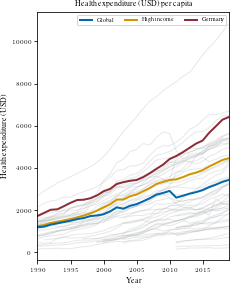

In [7]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    healthSpending_df[(healthSpending_df['Year']>=1990) & (healthSpending_df['Year']<=2019)], 
    xticks = 5, 
    output_fig_path = OUTPUT_PATH + "fig_HealthExpPerCapita.pdf",
    xlabel = 'Year',
    ylabel = "Health expenditure (USD)",
    title = "Health expenditure (USD) per capita")

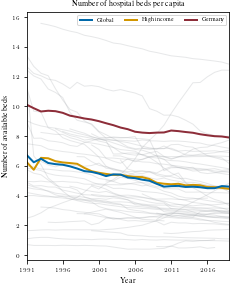

In [8]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    beds_df[(beds_df['Year']>=1990) & (beds_df['Year']<=2019)], 
    xticks = 5, 
    output_fig_path = OUTPUT_PATH + "fig_BedsPerCapita.pdf",
    xlabel = 'Year',
    ylabel = "Number of available beds",
    title = "Number of hospital beds per capita")

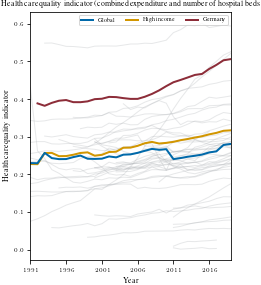

In [9]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    health_df[(health_df['Year']>=1990) & (health_df['Year']<=2019)], 
    xticks = 5, 
    output_fig_path = OUTPUT_PATH + "fig_HealthCareQualityIndicator.pdf",
    xlabel = 'Year',
    ylabel = "Health care quality indicator",
    title = "Health care quality indicator (combined expenditure and number of hospital beds")